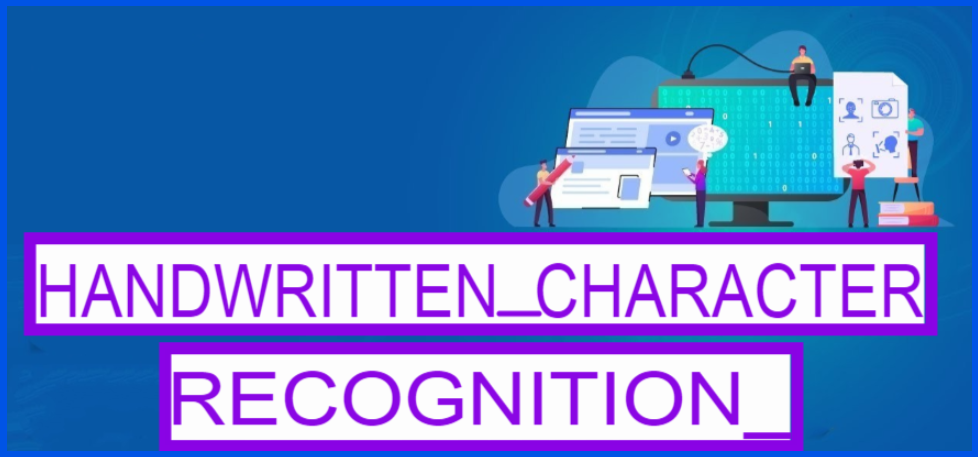

####**Dataset Description**


The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



####**Skills Gained**

In [70]:
#--------------------Installing TensorFlow--------------------#
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


> <--------------------Import necessary libraries -------------------->
* To get started, we’ll need to import some libraries from PyTorch. In addition, we will also use matplotlib.pyplot to see our image data and test data.
* We will import requests to get an image from the internet to test our model. We also need the Image module from the PIL library because that is what our testing image will be, an image. We also need to import the copy library in order to copy our model later on.

In [62]:
import torch, torchvision     #_____________Torch is a Python package that provides two high-level features
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

#------------------------------------------------------------------------------#
import requests
from PIL import Image
from io import BytesIO

#------------------------------------------------------------------------------#
import copy
#------------------------------------------------------------------------------#

from sklearn.metrics import confusion_matrix
import pandas as pd     #_____________data structures and data analysis tools
import numpy as np     #_____________NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more

#------------------------------------------------------------------------------#

import spacy     #_____________spaCy is a free open-source library for Natural_Language_Processing in Python
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

# -----------------------------------------------------------------------------#
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
# <--------------------Displaying the Torchvision Version-------------------->
print(tf.keras.__version__)


2.8.0


> <--------------------Preparing the Data-------------------->
* Loading the Data

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [71]:
#--------------------Loading MNIST dataset--------------------#
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
#--------------------Data Exploration-----------------------#
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


> <--------------------Data Preprocessing-------------------->

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [6]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


> <--------------------Designing the Model-------------------->

###Preparing the Model 0: Single layer Perceptron

Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

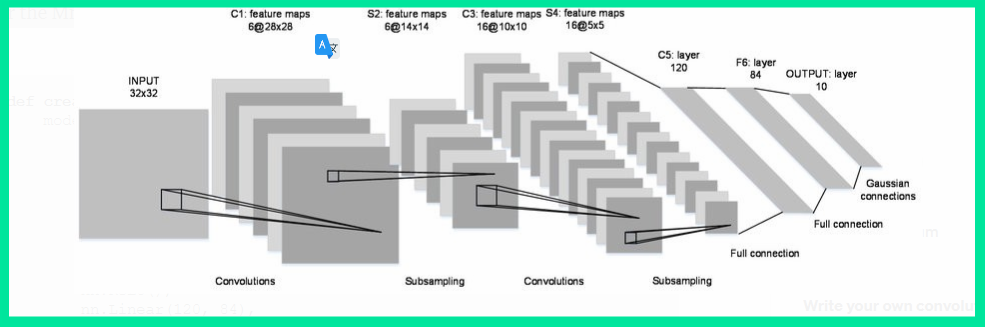

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [8]:
#--------------------Compiling the model.--------------------#
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
#--------------------Training the model.--------------------# 
training = model_0.fit(X_train,Y_train, batch_size=64,epochs=70,validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 5s 3ms/step - loss: 1.1012 - accuracy: 0.7365 - val_loss: 0.6579 - val_accuracy: 0.8576
Epoch 2/70
750/750 [==============================] - 2s 3ms/step - loss: 0.6098 - accuracy: 0.8540 - val_loss: 0.5082 - val_accuracy: 0.8769
Epoch 3/70
750/750 [==============================] - 2s 3ms/step - loss: 0.5132 - accuracy: 0.8713 - val_loss: 0.4499 - val_accuracy: 0.8863
Epoch 4/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4667 - accuracy: 0.8796 - val_loss: 0.4175 - val_accuracy: 0.8916
Epoch 5/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4380 - accuracy: 0.8846 - val_loss: 0.3960 - val_accuracy: 0.8964
Epoch 6/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4181 - accuracy: 0.8886 - val_loss: 0.3815 - val_accuracy: 0.8996
Epoch 7/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4033 - accuracy: 0.8911 - val_loss: 0.3699 - val_accuracy: 0.9014
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


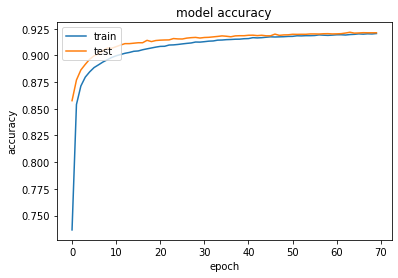

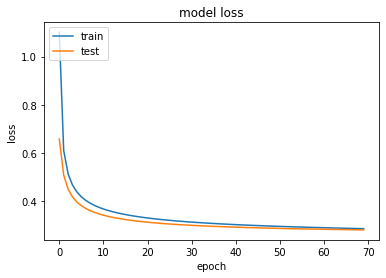

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
#--------------------list all data in training--------------------#
print(training.history.keys())
#--------------------summarize training for accuracy--------------------#
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#--------------------summarize traning for loss--------------------#
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
#--------------------evaluate the model--------------------#
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2825 - accuracy: 0.9213
Test accuracy: 0.9212999939918518


In [12]:
model_0.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fd68c1be590>>

In [13]:
model_0.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

###Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron 

In [14]:
# Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [15]:
#--------------------Compiling the model.--------------------#
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
#--------------------Training the model.--------------------#
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 3s 4ms/step - loss: 0.9995 - accuracy: 0.7347 - val_loss: 0.4513 - val_accuracy: 0.8841
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4142 - accuracy: 0.8878 - val_loss: 0.3414 - val_accuracy: 0.9045
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3438 - accuracy: 0.9032 - val_loss: 0.3022 - val_accuracy: 0.9130
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3086 - accuracy: 0.9133 - val_loss: 0.2773 - val_accuracy: 0.9204
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2838 - accuracy: 0.9195 - val_loss: 0.2573 - val_accuracy: 0.9273
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2646 - accuracy: 0.9246 - val_loss: 0.2441 - val_accuracy: 0.9323
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2481 - accuracy: 0.9299 - val_loss: 0.2317 - val_accuracy: 0.9358

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


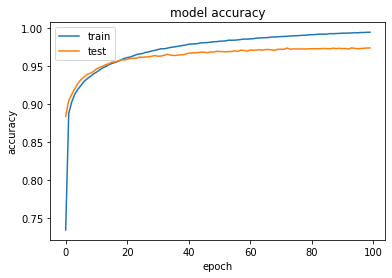

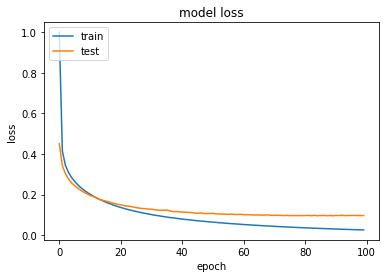

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
#--------------------list all data in training--------------------#
print(training.history.keys())
#--------------------summarize training for accuracy--------------------#
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#--------------------summarize traning for loss--------------------#
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
#--------------------Evaluate the model--------------------#
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.9747
Test accuracy: 0.9746999740600586


In [19]:
model_1.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fd5fa1d0810>>

In [20]:
model_1.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.07812142, -0.03682221, -0.01035585, ..., -0.0766288 ,
         -0.07436955,  0.08327086],
        [ 0.0693391 , -0.00497025, -0.01191208, ..., -0.0385458 ,
          0.05536678, -0.01942042],
        [-0.03974143, -0.07774645,  0.02434271, ..., -0.06352156,
         -0.01951634, -0.02653189],
        ...,
        [-0.08188315, -0.01909161,  0.07543328, ...,  0.06730344,
          0.08247309,  0.0559398 ],
        [ 0.02962305,  0.07533895, -0.03302352, ...,  0.0287485 ,
         -0.07164037, -0.07639905],
        [-0.00898194,  0.01869131,  0.03217135, ...,  0.07139308,
          0.06048847,  0.02681584]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.01650219,  0.03599935,  0.03109184, -0.12490939,  0.08464853,
         0.13087188,  0.02158737, -0.00927493, -0.02459254,  0.16572154,
        -0.0277079 , -0.00796504,  0.18867993,  0.08451761, -0.0174

In [21]:
model_1.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': No

###Improved Model 2 - Adding Dropout to Avoid Overfitting

In [22]:
from tensorflow.keras.layers import Dropout

# Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [23]:
#--------------------Compiling the model.--------------------#
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
#--------------------Training the model.--------------------# 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 1.3471 - accuracy: 0.5763 - val_loss: 0.5517 - val_accuracy: 0.8670
Epoch 2/50
750/750 [==============================] - 3s 3ms/step - loss: 0.6629 - accuracy: 0.7980 - val_loss: 0.3823 - val_accuracy: 0.8988
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5220 - accuracy: 0.8440 - val_loss: 0.3242 - val_accuracy: 0.9097
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4514 - accuracy: 0.8654 - val_loss: 0.2877 - val_accuracy: 0.9181
Epoch 5/50
750/750 [==============================] - 3s 3ms/step - loss: 0.4131 - accuracy: 0.8773 - val_loss: 0.2621 - val_accuracy: 0.9244
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3799 - accuracy: 0.8900 - val_loss: 0.2436 - val_accuracy: 0.9291
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3541 - accuracy: 0.8946 - val_loss: 0.2288 - val_accuracy: 0.9355
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


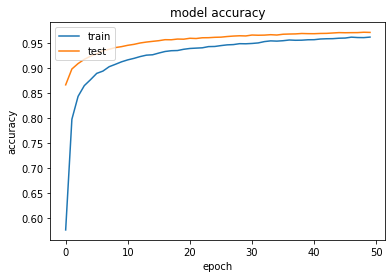

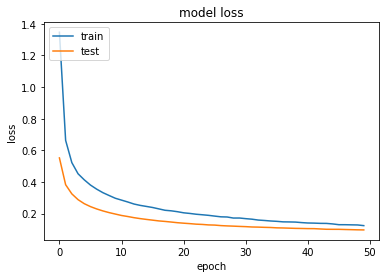

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
#--------------------list all data in training--------------------#
print(training.history.keys())
#--------------------summarize training for accuracy--------------------#
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#--------------------summarize traning for loss--------------------#
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
#--------------------Evaluate the model--------------------#
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9726
Test accuracy: 0.972599983215332


In [27]:
model_2.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fd5e9cea890>>

In [28]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.0806201 , -0.04526087, -0.01190533, ...,  0.02061215,
          0.0491888 ,  0.00910921],
        [ 0.0281047 , -0.00187378,  0.05081684, ..., -0.03105257,
          0.07828816, -0.03612408],
        [-0.0252803 , -0.02838216, -0.04879374, ...,  0.05684783,
          0.07871685,  0.06120896],
        ...,
        [ 0.01626473,  0.06152346, -0.04009665, ..., -0.01488572,
          0.01607627,  0.02329136],
        [-0.01548122, -0.0570738 ,  0.05693188, ..., -0.01411462,
         -0.05341155, -0.05285803],
        [-0.04500001,  0.0666484 , -0.07682198, ..., -0.05309992,
          0.07215085, -0.06047454]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 0.13168222,  0.01866513,  0.04748079, -0.09947282, -0.01120925,
         0.03921663, -0.05659267, -0.10349961,  0.06447286, -0.03363512,
         0.08544201, -0.02655175, -0.01118421, -0.01598303,  0.08

In [29]:
model_2.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
  

###Improved Model 3: Changing the Optimizer - Adam

In [30]:
# Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [31]:
#--------------------Compiling the model.--------------------#
model_3.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
#--------------------Training the model.--------------------# 
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2) 


Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.7153 - accuracy: 0.7795 - val_loss: 0.2511 - val_accuracy: 0.9271
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3537 - accuracy: 0.8964 - val_loss: 0.1943 - val_accuracy: 0.9438
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2848 - accuracy: 0.9172 - val_loss: 0.1667 - val_accuracy: 0.9519
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2433 - accuracy: 0.9284 - val_loss: 0.1482 - val_accuracy: 0.9577
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2206 - accuracy: 0.9344 - val_loss: 0.1340 - val_accuracy: 0.9625
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2006 - accuracy: 0.9410 - val_loss: 0.1216 - val_accuracy: 0.9648
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1828 - accuracy: 0.9460 - val_loss: 0.1175 - val_accuracy: 0.9666
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


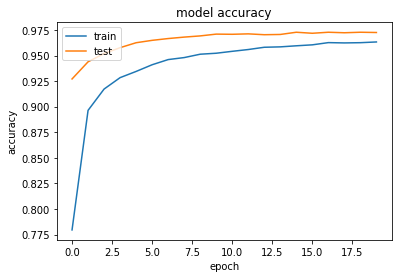

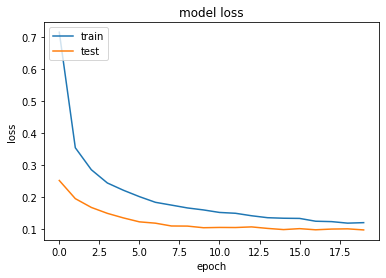

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
#--------------------list all data in training--------------------#
print(training.history.keys())
#--------------------summarize training for accuracy--------------------#
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#--------------------summarize traning for loss--------------------#
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
#--------------------Evaluate the model--------------------#
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0963 - accuracy: 0.9717
Test accuracy: 0.9717000126838684


In [35]:
model_3.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fd5e9ba4f50>>

In [36]:
model_3.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.00420473,  0.07241064,  0.07661875, ..., -0.00517969,
          0.05317882, -0.01070019],
        [-0.01119678,  0.07179742,  0.05081525, ..., -0.01383457,
         -0.07589439,  0.01294632],
        [ 0.0283155 ,  0.01766451, -0.03110394, ...,  0.00110082,
         -0.0085433 ,  0.07396979],
        ...,
        [-0.07640254, -0.07244635, -0.01378126, ..., -0.05707322,
         -0.06978015, -0.07600467],
        [-0.05162996, -0.04682732,  0.08081361, ...,  0.08089989,
          0.01063833, -0.01714796],
        [ 0.02942356,  0.06196996,  0.07634021, ..., -0.00864653,
         -0.04029734, -0.04904823]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.03498266, -0.12342042,  0.01217523,  0.22682029,  0.19133082,
         0.13581342, -0.03431531,  0.02064943, -0.15907976, -0.05926934,
         0.14032191,  0.04590217, -0.24071556,  0.08378478,  0.0481

In [37]:
model_3.get_config()

{'name': 'sequential_3',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_2',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
 

###Improved Model 4: Increasing the number of Hidden Layer neuron 

In [38]:
# Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [39]:
#--------------------Compiling the model.--------------------#
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
#--------------------Training the model.--------------------#
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2) 


Epoch 1/31
375/375 [==============================] - 2s 4ms/step - loss: 0.3025 - accuracy: 0.9076 - val_loss: 0.1149 - val_accuracy: 0.9649
Epoch 2/31
375/375 [==============================] - 1s 4ms/step - loss: 0.1277 - accuracy: 0.9611 - val_loss: 0.0962 - val_accuracy: 0.9715
Epoch 3/31
375/375 [==============================] - 2s 4ms/step - loss: 0.0929 - accuracy: 0.9710 - val_loss: 0.0891 - val_accuracy: 0.9732
Epoch 4/31
375/375 [==============================] - 2s 5ms/step - loss: 0.0734 - accuracy: 0.9764 - val_loss: 0.0769 - val_accuracy: 0.9769
Epoch 5/31
375/375 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9801 - val_loss: 0.0788 - val_accuracy: 0.9787
Epoch 6/31
375/375 [==============================] - 1s 3ms/step - loss: 0.0512 - accuracy: 0.9837 - val_loss: 0.0886 - val_accuracy: 0.9763
Epoch 7/31
375/375 [==============================] - 1s 3ms/step - loss: 0.0457 - accuracy: 0.9847 - val_loss: 0.0881 - val_accuracy: 0.9744
Epoch 

In [41]:
#--------------------Evaluate the model_4--------------------#
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9828
Test accuracy: 0.9828000068664551


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


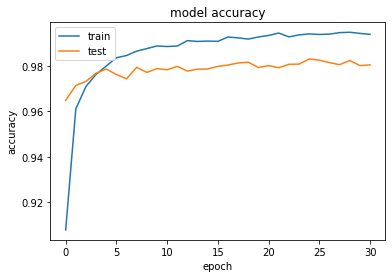

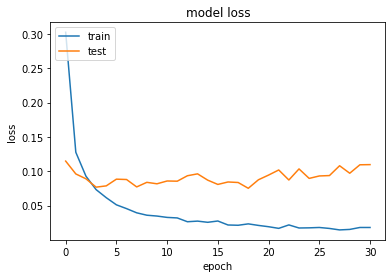

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
#--------------------list all data in training--------------------#
print(training.history.keys())
#--------------------summarize training for accuracy--------------------#
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#--------------------summarize traning for loss--------------------#
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
model_4.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fd5e9b8ed10>>

In [44]:
model_4.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.06515193,  0.05027242,  0.0649199 , ..., -0.03762503,
         -0.06491005,  0.0268087 ],
        [-0.04946628, -0.0542861 , -0.00732185, ...,  0.03599785,
         -0.02449937,  0.03825159],
        [-0.06568196,  0.01662803, -0.01630789, ...,  0.02739087,
         -0.00670428, -0.04681729],
        ...,
        [ 0.05282818,  0.01765037, -0.04971829, ...,  0.02177142,
         -0.00809945, -0.0280889 ],
        [ 0.02993906,  0.0452535 ,  0.05131921, ..., -0.05829986,
          0.05033833,  0.03284973],
        [-0.01072309,  0.05184747,  0.05731757, ...,  0.02063463,
          0.00287829, -0.05540558]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 3.02449390e-02,  3.23600732e-02, -3.98832187e-02,  3.24489176e-03,
        -1.11180609e-02, -2.10820541e-01, -1.16128944e-01, -1.81237817e-01,
        -9.09440666e-02, -2.16072965e-02, -2.68810038e-02, 

In [45]:
model_4.get_config()

{'name': 'sequential_4',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_4',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,


###Improved Model 5: Manipulating the batch size

In [46]:
# Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [47]:
#--------------------Compiling the model.--------------------#
model_5.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
#--------------------Training the model.--------------------#
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 


Epoch 1/30
750/750 [==============================] - 3s 4ms/step - loss: 0.2719 - accuracy: 0.9177 - val_loss: 0.1133 - val_accuracy: 0.9647
Epoch 2/30
750/750 [==============================] - 2s 3ms/step - loss: 0.1233 - accuracy: 0.9616 - val_loss: 0.0969 - val_accuracy: 0.9693
Epoch 3/30
750/750 [==============================] - 2s 3ms/step - loss: 0.0952 - accuracy: 0.9699 - val_loss: 0.0841 - val_accuracy: 0.9749
Epoch 4/30
750/750 [==============================] - 2s 3ms/step - loss: 0.0758 - accuracy: 0.9761 - val_loss: 0.0861 - val_accuracy: 0.9756
Epoch 5/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0669 - accuracy: 0.9791 - val_loss: 0.0911 - val_accuracy: 0.9743
Epoch 6/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0569 - accuracy: 0.9820 - val_loss: 0.0872 - val_accuracy: 0.9767
Epoch 7/30
750/750 [==============================] - 2s 3ms/step - loss: 0.0497 - accuracy: 0.9842 - val_loss: 0.0881 - val_accuracy: 0.9771
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


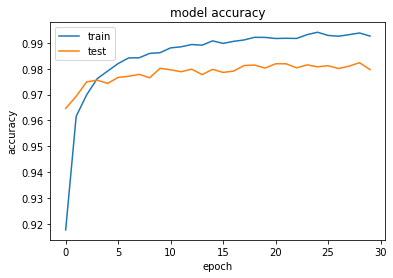

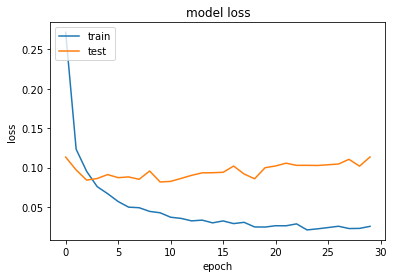

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
#--------------------list all data in training--------------------#
print(training.history.keys())
#--------------------summarize training for accuracy--------------------#
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#--------------------summarize traning for loss--------------------#
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
#--------------------Evaluate the model--------------------#
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1019 - accuracy: 0.9803
Test accuracy: 0.9803000092506409


In [51]:
model_5.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fd5e67f5850>>

In [52]:
model_5.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.06397983,  0.05848452, -0.01119354, ...,  0.02566564,
          0.01144558, -0.06460731],
        [-0.02480188, -0.02467134,  0.04626745, ...,  0.05321398,
         -0.02340288, -0.04963702],
        [ 0.00474516, -0.03712245,  0.01630878, ...,  0.05975236,
          0.01627453,  0.01897047],
        ...,
        [ 0.03124581,  0.06556746,  0.00269148, ...,  0.01742356,
          0.06760791, -0.0154977 ],
        [-0.06558458, -0.05174719, -0.06689711, ...,  0.03984082,
          0.04845019,  0.05885129],
        [-0.02399834, -0.01188214,  0.00969326, ...,  0.0525347 ,
         -0.05213721, -0.03934233]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-4.39920649e-02, -6.37188777e-02, -1.97812766e-01, -4.39545028e-02,
        -7.47051984e-02,  7.82265421e-03, -1.24290332e-01,  1.19020000e-01,
        -1.19191166e-02, -1.69904903e-02,  8.51489827e-02, 

In [53]:
model_5.get_config()

{'name': 'sequential_5',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_6',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,


###Improved Model 6: Adding Another Hidden Layer to the Model

In [54]:
import tensorflow as tf

# In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [55]:
#--------------------Compiling the model.--------------------#
model_6.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
#--------------------Training the model.--------------------#
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 

Epoch 1/30
750/750 [==============================] - 3s 4ms/step - loss: 0.2986 - accuracy: 0.9083 - val_loss: 0.1480 - val_accuracy: 0.9563
Epoch 2/30
750/750 [==============================] - 3s 3ms/step - loss: 0.1411 - accuracy: 0.9575 - val_loss: 0.1214 - val_accuracy: 0.9655
Epoch 3/30
750/750 [==============================] - 3s 3ms/step - loss: 0.1090 - accuracy: 0.9668 - val_loss: 0.0954 - val_accuracy: 0.9721
Epoch 4/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0910 - accuracy: 0.9723 - val_loss: 0.0824 - val_accuracy: 0.9765
Epoch 5/30
750/750 [==============================] - 3s 3ms/step - loss: 0.0793 - accuracy: 0.9762 - val_loss: 0.0954 - val_accuracy: 0.9737
Epoch 6/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0750 - accuracy: 0.9775 - val_loss: 0.0831 - val_accuracy: 0.9769
Epoch 7/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0657 - accuracy: 0.9803 - val_loss: 0.0802 - val_accuracy: 0.9768
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


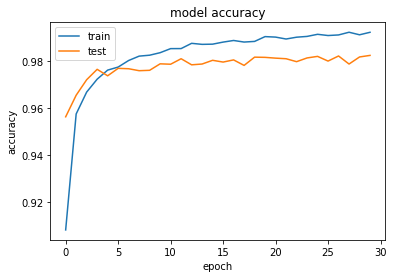

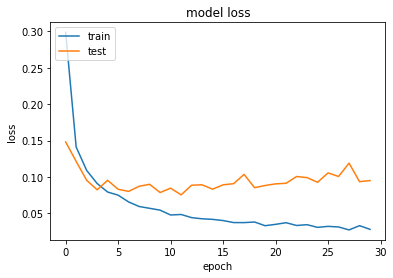

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
#--------------------list all data in training--------------------#
print(training.history.keys())
#--------------------summarize training for accuracy--------------------#
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#--------------------summarize traning for loss--------------------#
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
#--------------------Evaluate the model--------------------#
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0884 - accuracy: 0.9825
Test accuracy: 0.9825000166893005


In [59]:
model_6.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fd5e66e5910>>

In [60]:
model_6.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.00902151, -0.02127364,  0.04903241, ..., -0.04346511,
          0.04847979,  0.02464795],
        [-0.00787083,  0.06684589, -0.02606661, ...,  0.02332962,
         -0.06261913,  0.03797258],
        [-0.05553799,  0.03916972,  0.01317357, ..., -0.05145259,
         -0.03750113,  0.00730918],
        ...,
        [-0.02118487, -0.00165571,  0.02063692, ..., -0.00163417,
          0.06066488,  0.04838576],
        [-0.01171481, -0.04731061, -0.01673515, ...,  0.0616326 ,
          0.06735857, -0.00841013],
        [ 0.03141444,  0.02418691,  0.00045627, ..., -0.03273319,
          0.06095807,  0.04927153]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-1.15645632e-01, -1.59050539e-01, -1.88332513e-01, -2.46956453e-01,
        -5.36196306e-02, -1.95083395e-02,  3.46516669e-02, -3.93812656e-02,
        -1.77288994e-01, -1.28879353e-01,  2.10897326e-02, 

In [61]:
model_6.get_config()

{'name': 'sequential_6',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_8',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,


> **<--------------------Conclusion-------------------->**
* In conclusion, we have been successful in our task of training a CNN to differentiate between the digits 1–9! We can also give any appropriate image to the model and receive the output. You can try playing around with the values such as learning rate and epochs to maximize the potential of the model.